# Examples of lotka-voltera models describing complex species interactions

## Simple Lotka-Voltera model

$$ \frac{dx}{dt} = ax - bxy $$
$$ \frac{dy}{dt} = -cy + dxy $$

- $x$ : prey population size
- $y$ : predator population size
- $a$ : growth rate of the prey
- $b$ : prey mortality (due predation)
- $c$ : death rate of the predator
- $d$ : predator growth rate (due predation)


![imgs/lv1.png](imgs/lv1.jpg)

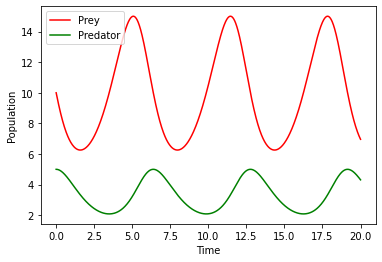

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the differential equations
def predator_prey(state, t):
    x, y = state
    dxdt = a*x - b*x*y
    dydt = -c*y + d*x*y
    return dxdt, dydt

# Define the initial conditions
x0 = 10
y0 = 5
state0 = [x0, y0]

# Define the time points for the solution
t = np.linspace(0, 20, 1000)

# Define the model parameters
a = 1.0 # growth rate of the prey population
b = 0.3 # prey mortality due predation
c = 1.0 # growth rate of the predator population (moratility)
d = 0.1 # Predator growth due predation

# Solve the differential equations
states = odeint(predator_prey, state0, t)

# Plot the results
plt.plot(t, states[:, 0], 'r', label='Prey')
plt.plot(t, states[:, 1], 'g', label='Predator')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

# Lanac

![imgs/lv2.pmg](imgs/lv2.jpg)

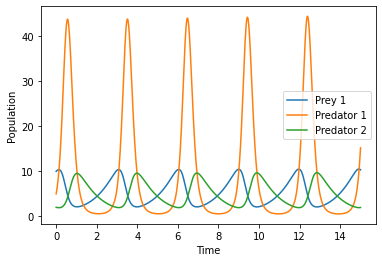

In [2]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the function for the differential equations
def lotka_volterra( t, init, alpha, beta, gamma, delta, epsilon, mu):
    x = init[0]
    y = init[1]
    z = init[2]
    dxdt = alpha*x - beta*x*y
    dydt = -gamma*y + delta*x*y - epsilon*y*z
    dzdt = mu*y*z - z
    return [dxdt, dydt, dzdt]

# Set the parameter values
alpha = 1.0
beta = 0.1
gamma = 1.5
delta = 0.75
epsilon = 0.5
mu = 0.1

# Initial conditions
x0 = 10
y0 = 5
z0 = 2

init = [x0, y0, z0]

# Time points for the solution
t = np.linspace(0, 15, 1000)

# Solve the differential equations
sol = solve_ivp(lotka_volterra, (0, 15), init, args=(alpha, beta, gamma, delta, epsilon, mu), t_eval=t)

# Plot the solution
plt.plot(sol.t, sol.y[0], label='Prey 1')
plt.plot(sol.t, sol.y[1], label='Predator 1')
plt.plot(sol.t, sol.y[2], label='Predator 2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()


## "Trokut"
![](imgs/lv3.jpg)

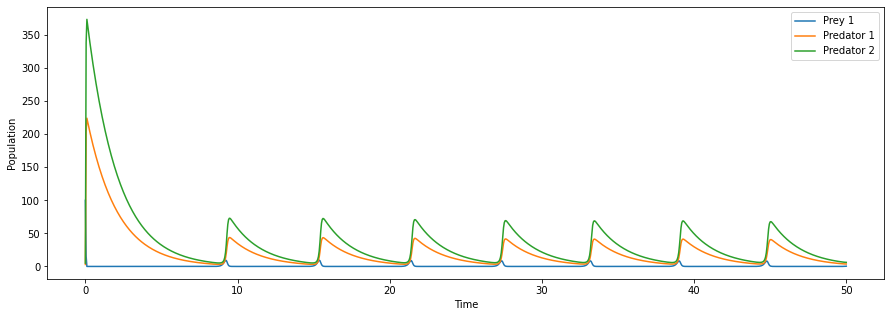

In [60]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the function for the differential equations
def lotka_volterra( t, init, alpha, beta, gamma, delta, epsilon, mu, sigma, omega1, omega2):
    x = init[0]
    y = init[1]
    z = init[2]
    dxdt = alpha*x - beta*x*y - gamma*x*z
    dydt = -delta*y + omega1*x*y - epsilon*y*z + sigma*y*z
    dzdt = -mu*z  + omega2*x*z - sigma*y*z + epsilon*y*z

    return [dxdt, dydt, dzdt]

# Set the parameter values
alpha = 10. # Growth x
beta = 0.15  # Mort x from y 
gamma = 0.3 # Mort x from z

delta = 0.5 # mort y
epsilon = 0.002 # mort y from z
omega1 = 1.05

mu = 0.5 # mort z
sigma = 0.002 # mort z from y
omega2 = 1.05

# Initial conditions
x0 = 100
y0 = 3
z0 = 5

init = [x0, y0, z0]

# Time points for the solution
t = np.linspace(0, 50, 1000)

# Solve the differential equations
sol = solve_ivp(lotka_volterra, (0, 50), init, args=(alpha, beta, gamma, delta, epsilon, mu, sigma, omega1, omega2), t_eval=t)

# Plot the solution
plt.figure(figsize=(15,5))
plt.plot(sol.t, sol.y[0], label='Prey 1')
plt.plot(sol.t, sol.y[1], label='Predator 1')
plt.plot(sol.t, sol.y[2], label='Predator 2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

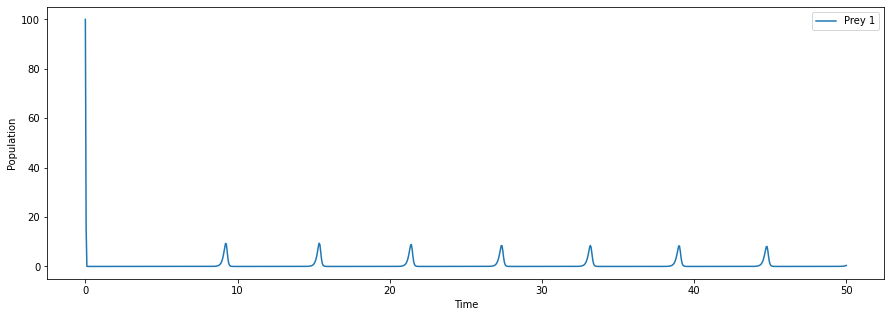

In [61]:
# Plot the solution
plt.figure(figsize=(15,5))
plt.plot(sol.t, sol.y[0], label='Prey 1')
# plt.plot(sol.t, sol.y[1], label='Predator 1')
# plt.plot(sol.t, sol.y[2], label='Predator 2')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()

## Mreža

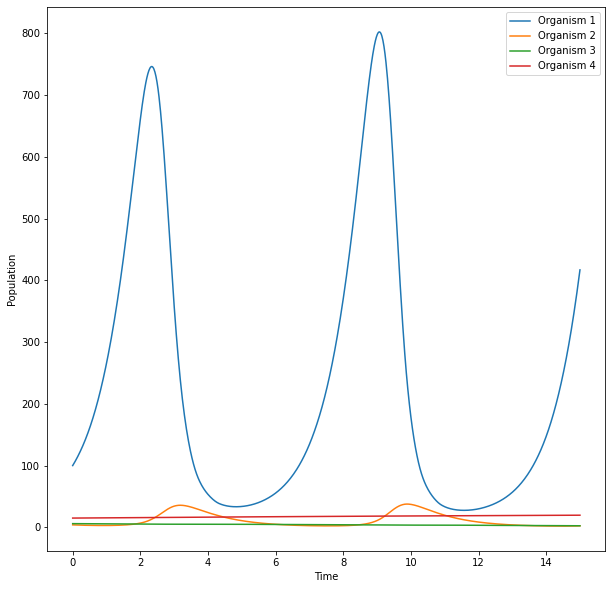

In [128]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the predator-prey equations (5 organisms)
def predator_prey(t, y, a, b, c, d, f, g, h, i):
    x1, x2, x3, x4 = y
    return [
        a*x1 - b*x1*x2 - c*x1*x3 - d*x1*x4,
        -f*x2 + g*x1*x2 + h*x3*x2 + i*x4*x2,
        -g*x3 + h*x2*x3 - i*x3*x4,
        -h*x4 + i*x3*x4
        ]

# Set initial conditions and parameter values
x0 = [100, 4, 6, 15]
a = 4.
b = 0.1
c = 0.15
d = 0.12
f = 1.05
g = 0.004
h = 0.003
i = 0.005

# Time range for the solution
t_eval = np.linspace(0, 15, 1000)

# Solve the ODE using the solve_ivp function
sol = solve_ivp(predator_prey, [0, 15], x0, args=(a, b, c, d, f, g, h, i), t_eval=t_eval)

# Plot the solution
plt.figure(figsize=(10,10))
plt.plot(sol.t, sol.y[0], label='Organism 1')
plt.plot(sol.t, sol.y[1], label='Organism 2')
plt.plot(sol.t, sol.y[2], label='Organism 3')
plt.plot(sol.t, sol.y[3], label='Organism 4')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.show()